In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
# load the dataset
toyo=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
toyo.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
# check for missing value
toyo.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [15]:
toyo.shape

(1436, 38)

In [28]:
toyo.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [29]:
# pd.to_numeric() with errors parameter = 'coerce'
toyo['Mfg_Month'] = pd.to_numeric(toyo['Mfg_Month'],errors='coerce')
toyo['Mfg_Year'] = pd.to_numeric(toyo['Mfg_Year'],errors='coerce')

In [31]:
# Check for Duplicates and Drop Duplicates
# count the number of duplicate records
toyo.duplicated().sum()

0

In [32]:
toyo.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

## Outlier Detection

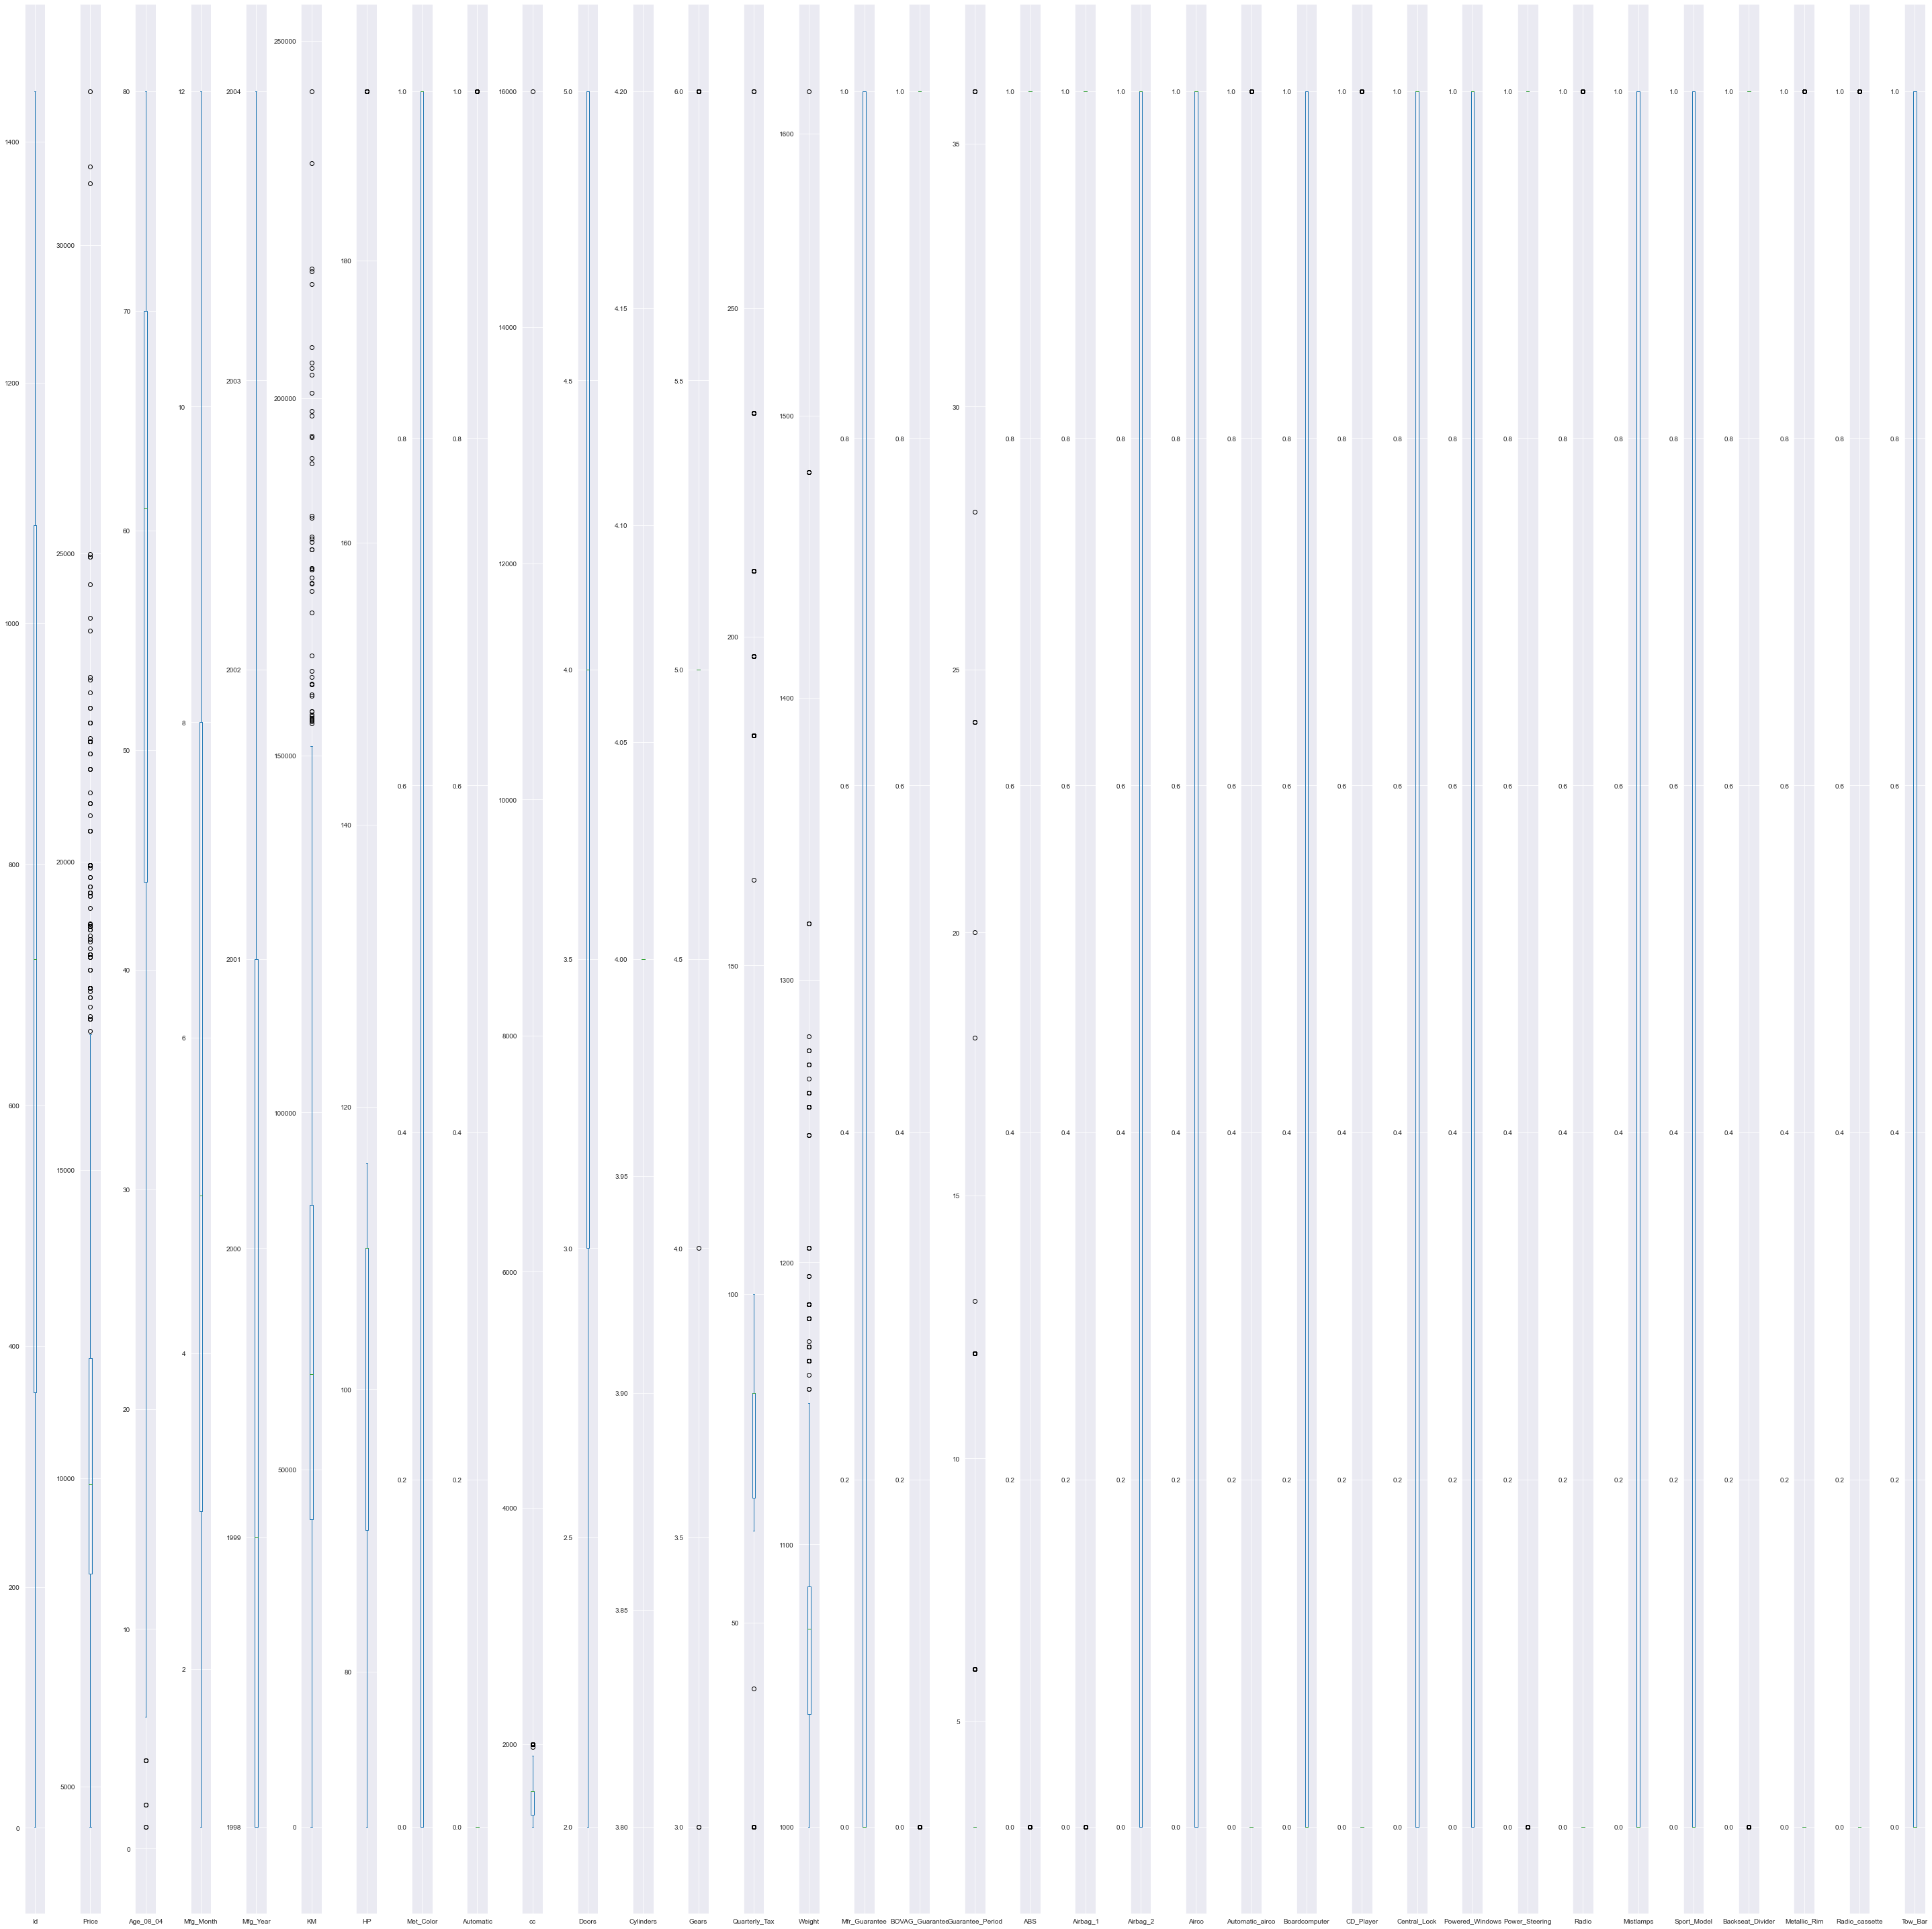

In [35]:
# using boxplots
toyo.plot(kind='box', subplots=True,figsize=(40,40))
plt.tight_layout();

In [37]:
toyo['Price'].value_counts().sum()

1436

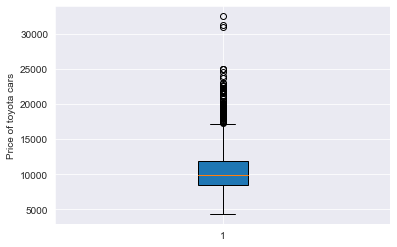

In [18]:
# boxplot
plt.boxplot(toyo['Price'],patch_artist=True);
plt.ylabel('Price of toyota cars');

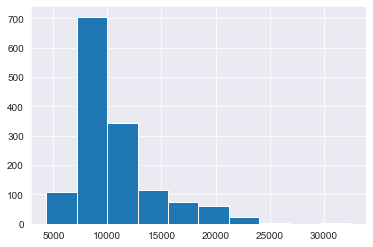

In [24]:
plt.hist(toyo['Price'],edgecolor='white');

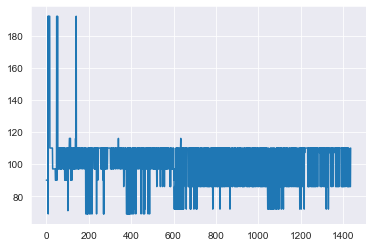

In [26]:
# lineplot
plt.plot(toyo['HP']);

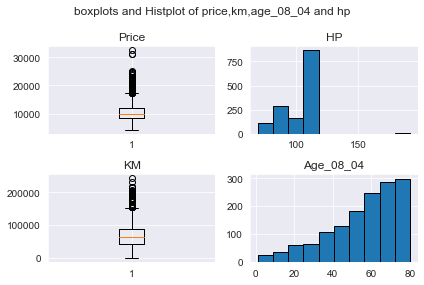

In [27]:
#plt.subplots
fig,axes = plt.subplots(ncols=2,nrows=2)
axes[0][0].boxplot(toyo['Price'])
axes[0][1].hist(toyo['HP'],edgecolor='black')
axes[1][0].boxplot(toyo['KM'])
axes[1][1].hist(toyo['Age_08_04'],edgecolor='black')
plt.suptitle('boxplots and Histplot of price,km,age_08_04 and hp')
axes[0][0].title.set_text('Price')
axes[0][1].title.set_text('HP')
axes[1][0].title.set_text('KM')
axes[1][1].title.set_text('Age_08_04')
plt.tight_layout();

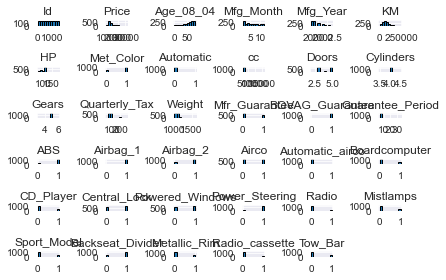

In [38]:
# histogram
toyo.hist(edgecolor='k')
plt.tight_layout();

## Correlation matrix

In [7]:
corel=toyo.corr()

In [8]:
corel

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


<AxesSubplot:>

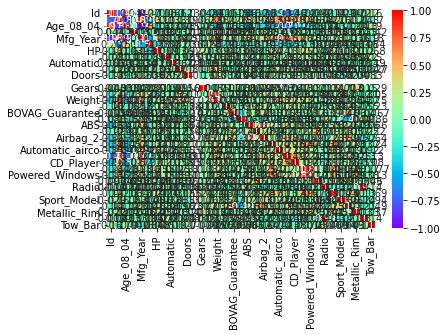

In [9]:
# heatmap
sns.heatmap(data=corel,
           annot=True,
           cmap='rainbow',
           vmin=-1,
           vmax=1)

##  scatterplot between variables along with histograms

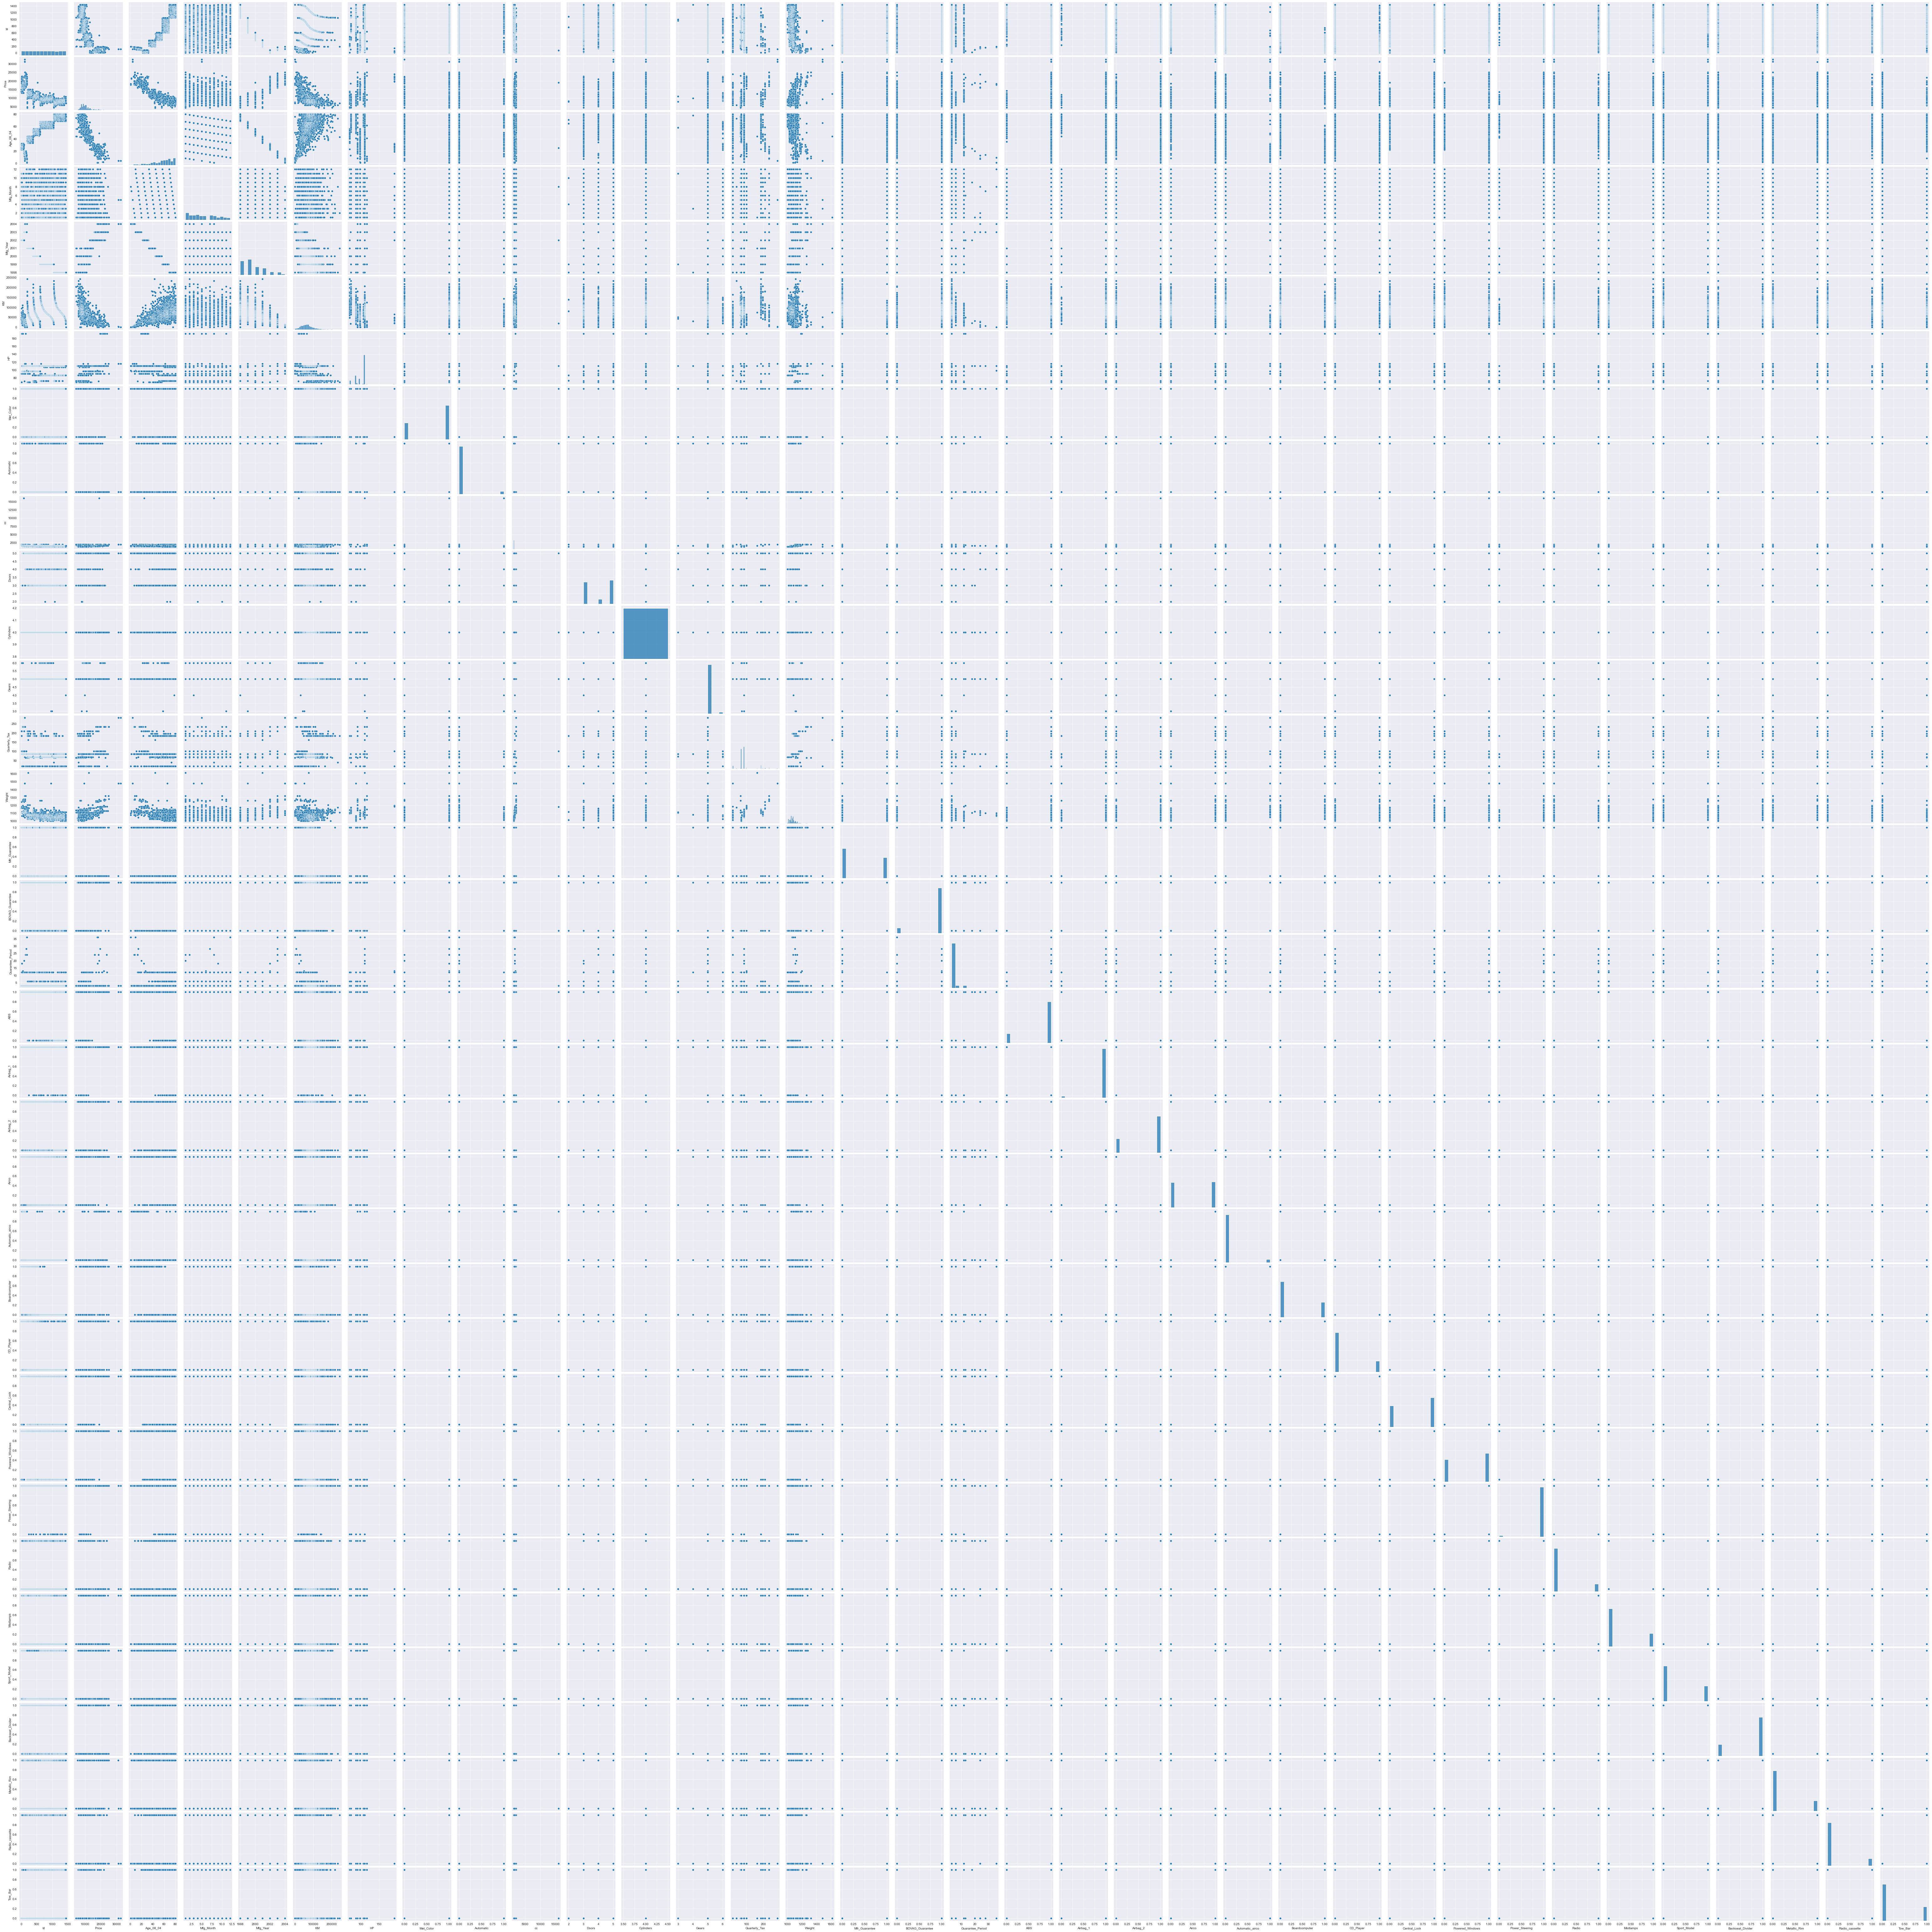

In [10]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(toyo)

## Prepering a model

In [11]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+Mfg_Month+Mfg_Year+KM+Fuel_Type+HP+Met_Color+Central_Lock+Powered_Windows+Power_Steering+Radio+Mistlamps+Sport_Model+Backseat_Divider+Metallic_Rim+Radio_cassette+Tow_Bar',data=toyo).fit()

In [12]:
# coefficients
model.params

Intercept                -0.007139
Fuel_Type[T.Diesel]    2554.856295
Fuel_Type[T.Petrol]     234.989816
Age_08_04              -135.548334
Mfg_Month              -124.978156
Mfg_Year                  7.398549
KM                       -0.020188
HP                       50.875077
Met_Color                41.697449
Central_Lock            -63.690838
Powered_Windows         516.953560
Power_Steering         -425.007601
Radio                   567.923645
Mistlamps               473.016536
Sport_Model             764.080858
Backseat_Divider       -293.170534
Metallic_Rim             80.660905
Radio_cassette         -700.121744
Tow_Bar                -138.236254
dtype: float64

In [13]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept             -15.321353
Fuel_Type[T.Diesel]     7.089665
Fuel_Type[T.Petrol]     0.687340
Age_08_04             -51.226682
Mfg_Month             -11.509227
Mfg_Year               26.283846
KM                    -14.996799
HP                     16.667890
Met_Color               0.526441
Central_Lock           -0.414766
Powered_Windows         3.365353
Power_Steering         -1.648398
Radio                   0.714059
Mistlamps               4.484824
Sport_Model             8.975105
Backseat_Divider       -2.935620
Metallic_Rim            0.809948
Radio_cassette         -0.879560
Tow_Bar                -1.640611
dtype: float64 
 Intercept               3.790632e-49
Fuel_Type[T.Diesel]     2.113520e-12
Fuel_Type[T.Petrol]     4.919809e-01
Age_08_04               0.000000e+00
Mfg_Month               2.282683e-29
Mfg_Year               2.286474e-124
KM                      2.662787e-47
HP                      4.224279e-57
Met_Color               5.986643e-01
Central_Lock           

In [14]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.8616922969524721, 0.8600341651105765)